In [1]:
#Resumen de actividades semana 7

# Alejandro Munguia Salazar A01104775

# Data Analysis with Python (IBM) 
# Mod 4

****************
Modelo
****************

Se aplica una relación matemática para el pronóstico del precio del auto, conmsiderando las variables sus transformaciones y demás,
mientras mejor se la información y las variables mas significativas, mas preciso es.




In [5]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [3]:
path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)

***********

Rgresión lineal y regresión lineal múltiple.

**********

regresión lineal simple y de la regresión lineal múltiple.
    
La regresión lineal usa una variable independiente (x) para hacer una predicción.
La Regresión Lineal Múltiple se referirá a múltiples variables independientes (X1, X2....Xn) para hacer una predicción.

La regresión lineal simple (o SLR) es: Un método que nos ayuda a entender la relación entre
dos variables: La variable predictora (independiente) x, y la variable objetivo (dependiente) y.

Y = A + BX

al estimar el modelo se calculan los parametros A (intercepto de la recta) y B (Coeficiente cuanto cambia y ante un cambio de una undad de x)
Para pedecir se coloca el valor nuevo en el valor en x y el resultado es el valor predecido por la recta de y



En muchos casos, hay muchos factores que influyen en la cantidad de dinero que se paga por un coche, por ejemplo, la marca o la antigüedad del coche. En este modelo, esta
En este modelo, esta incertidumbre se tiene en cuenta asumiendo que se añade un pequeño valor aleatorio al punto en la línea; esto se llama ruido.


Por ejemplo, si no tenemos un coche con 20 millas por galón, podemos utilizar nuestro modelo para
hacer una predicción del precio de este coche. 
Podemos ver esto comparando el valor predicho con el valor real y la diferencia se llama error.


se usa: linear model de scikit-learn; luego creamos un objeto de regresión lineal utilizando el constructor. Definimos la variable predictora y la variable objetivo
y la variable objetivo. Luego usamos el método fit para ajustar el modelo y encontrar los parámetros b0 y b1. La entrada son las características y los objetivos.
Podemos obtener una predicción utilizando el método predict.

La salida es un array, el array tiene el mismo número de muestras que la entrada X.
El intercepto (b0) es un atributo del objeto "lm".
La pendiente (b1) también es un atributo del objeto "lm".
La relación entre el precio y el MPG en carretera viene dada por esta ecuación en negrita: "Precio
= 38,423.31 menos 821.73 veces mpg de carretera" como la ecuación que discutimos antes.




La regresión lineal múltiple se utiliza para explicar la relación entre

- Una variable continua objetivo (Y), y - Dos o más variables predictoras (X).

Si tenemos, por ejemplo, 4 variables predictoras, entonces
- B0: el intercepto (X=0) - B1: el coeficiente o parámetro de 𝑋1:
- B2: el coeficiente del parámetro 𝑋2: y así sucesivamente

y = a+ bx1+bx2+....+bxn



In [4]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)

********

Regresíon lineal

In [5]:
# Ejemplo 1
#"highway-mpg" para predecir el price

#Objeto de regresion lienal
lm = LinearRegression()

#Definendo variables en este caso nos interesa predecir el precio usando la milas por galón
X = df[['highway-mpg']]
Y = df['price']

#entrenando el modelo
lm.fit(X,Y)

# creando prediciones 
Yhat=lm.predict(X)
Yhat[0:5]   

#parámetros de la recta: 
print('el intercepto es: ' + str(lm.intercept_)  )
print('el coeficiente de x es: ' + str(lm.coef_)  )


el intercepto es: 38423.305858157386
el coeficiente de x es: [-821.73337832]


In [6]:
# Ejemplo 2
#"highway-mpg" para predecir el price


lm1 = LinearRegression()
lm1.fit(df[['engine-size']],df['price'])
Yhat=lm1.predict(X)
Yhat[0:5]   


print('el intercepto es: ' + str(lm1.intercept_)  )
print('el coeficiente de x es: ' + str(lm1.coef_)  )

el intercepto es: -7963.338906281049
el coeficiente de x es: [166.86001569]


C:\Users\AMUNGUIA\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- highway-mpg
Feature names seen at fit time, yet now missing:
- engine-size

  warnings.warn(message, FutureWarning)


*******
Reg multiple


prediciendo el precio usando:


-Horsepower
-Curb-weight
-Engine-size
-Highway-mpg


In [7]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
#parámetros de la recta: 
print('el intercepto es: ' + str(lm.intercept_)  )
print('el coeficiente de x es: ' + str(lm.coef_)  )
print('')
print('Price = -15678.742628061467 + 52.65851272(horsepower) + 4.69878948(curb-weight) + 81.95906216(engine-size) + 33.58258185(highway-mpg)')

el intercepto es: -15806.624626329198
el coeficiente de x es: [53.49574423  4.70770099 81.53026382 36.05748882]

Price = -15678.742628061467 + 52.65851272(horsepower) + 4.69878948(curb-weight) + 81.95906216(engine-size) + 33.58258185(highway-mpg)


In [8]:
# Ejemplo 2:
# precio en funcion de: normalized-losses" and "highway-mpg"

lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])
lm2.coef_
print('el intercepto es: ' + str(lm2.intercept_)  )
print('el coeficiente de x es: ' + str(lm2.coef_)  )
print('')
print('Price = 38201.31327245728 + 1.49789586 (normalized-losses) -820.45434016 (highway-mpg) ')

el intercepto es: 38201.31327245728
el coeficiente de x es: [   1.49789586 -820.45434016]

Price = 38201.31327245728 + 1.49789586 (normalized-losses) -820.45434016 (highway-mpg) 


********
2. Model Evaluation Using Visualization

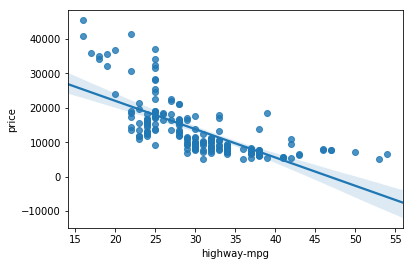

In [9]:
sns.regplot(x="highway-mpg", y="price", data=df)

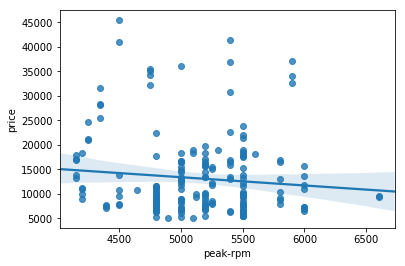

In [10]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [11]:
df[["peak-rpm","highway-mpg","price"]].corr()
# The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


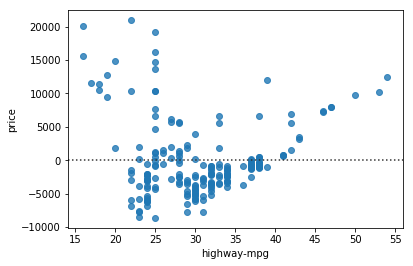

In [12]:
# Grafica de residuales o errores 
sns.residplot(df['highway-mpg'], df['price'])

# Una gráfica de residuos muestra los residuos en el eje vertical y la variable independiente (x) en el horizontal.
#- Si los puntos en una gráfica de residuos se distribuyen aleatoriamente alrededor del eje x, entonces un modelo lineal es apropiado para los datos.
#implica que  la varianza es constante y, por lo tanto, el modelo lineal se ajusta bien a estos datos.


# en esta gráfica los residuos no se distribuyen aleatoriamente alrededor del eje x, tal vez un modelo no lineal sea más apropiado para estos datos.


*********
Multiple Linear Regression


In [13]:
#Y_hat = lm.predict(Z)

el intercepto es: -15806.624626329198
el coeficiente de x es: [53.49574423  4.70770099 81.53026382 36.05748882]

Price = -15678.742628061467 + 52.65851272(horsepower) + 4.69878948(curb-weight) + 81.95906216(engine-size) + 33.58258185(highway-mpg)



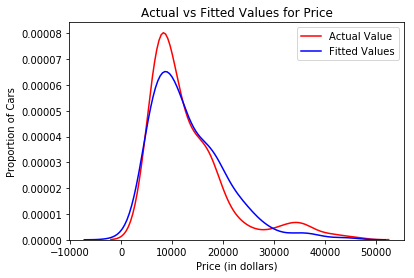

In [14]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
lm.fit(Z, df['price'])
#parámetros de la recta: 
print('el intercepto es: ' + str(lm.intercept_)  )
print('el coeficiente de x es: ' + str(lm.coef_)  )
print('')
print('Price = -15678.742628061467 + 52.65851272(horsepower) + 4.69878948(curb-weight) + 81.95906216(engine-size) + 33.58258185(highway-mpg)')

# generando prediciones
Y_hat = lm.predict(Z)

print('')
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

# Se ajusta razonablemente bien pero podría mejorar por el pico que aun presenta y las diferencias entre lineas

*****
3. Polynomial Regression and Pipelines

Se pueden usar las mismas variables pero con exponentes cambiando el orden esperando que se mejore el resultado siempre y cuando los coeficientes sigan siendo lineales.


Quadratic - 2nd Order
Yhat=a+b1X+b2X2
Cubic - 3rd Order
Yhat=a+b1X+b2X2+b3X3
Higher-Order:
Y=a+b1X+b2X2+b3X3...



In [15]:
# Para ayudar a graficar

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [16]:
x = df['highway-mpg']
y = df['price']

In [17]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3) # se estima el modelo con la variable el objetivo, y el numero de exploenentes que tentra en este caso la x maxima sera cubica
p = np.poly1d(f) # se le da formato de ecuación.
print('la ecuación es: ' )
print(p)

la ecuación es: 
        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


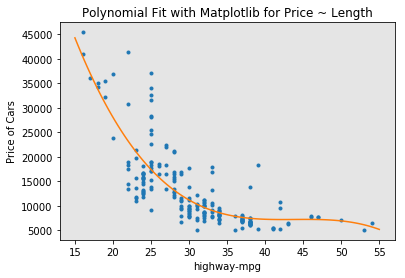

In [18]:
PlotPolly(p, x, y, 'highway-mpg')

la ecuación es: 
            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


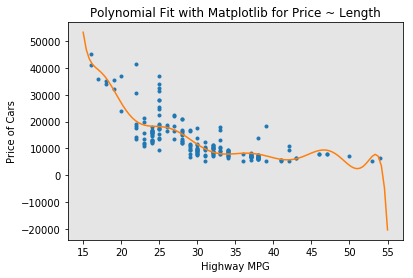

In [19]:
# haciendo la prueba con una de 11 exponenetes
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print('la ecuación es: ' )
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

*******
Con sci kit learn

In [23]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

pr=PolynomialFeatures(degree=2)
Z_pr=pr.fit_transform(Z)

print(Z.shape) # info  original definida arriba 
print(Z_pr.shape) #despues de la transformada ahora en lugar de 4 tiene 15

(201, 4)
(201, 15)


********
PIPE LINE!

In [27]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())] # Se crea la configuración
pipe=Pipeline(Input) # Se crea el pipeline
Z = Z.astype(float) # se cambian los datos a tipo float para evitar warnings
pipe.fit(Z,y)
ypipe=pipe.predict(Z)
ypipe[0:5]


array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164])

In [28]:
#Create a pipeline that standardizes the data, then produce a prediction using a linear regression model using the features Z and target y

Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y = df['price']

Input=[('scale',StandardScaler()),('model',LinearRegression())]
pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])